In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16,8]

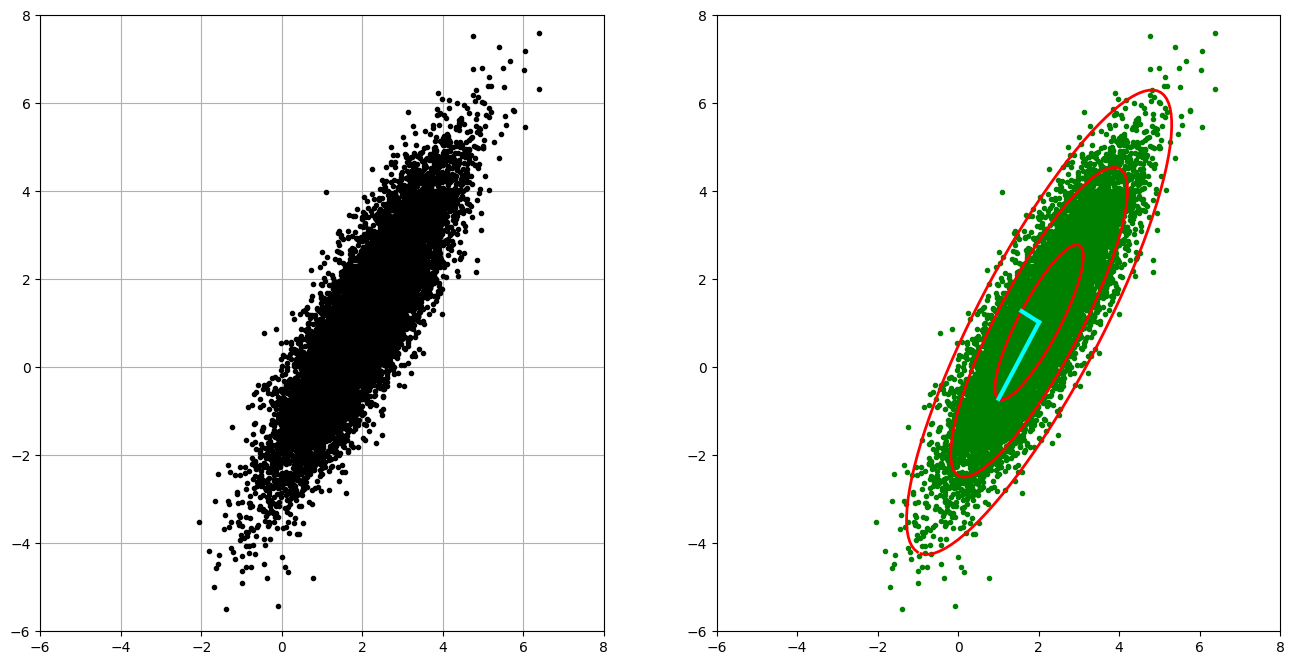

In [ ]:
xC = np.array([2,1])
sig = np.array([2, 0.5])

theta = np.pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2, nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k') #plot data to overlay PCA
ax1.grid()
plt.xlim((-6,8))
plt.ylim((-6,8))

Xavg = np.mean(X, axis=1)
B = X - np.tile(Xavg, (nPoints, 1)).T

#Find Principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0, :], X[1, :], '.', color='green')
plt.xlim((-6,8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], '-', color='r', linewidth = 2)
ax2.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + (2 * Xstd[1, :]), '-', color='r', linewidth = 2)
ax2.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + (3 * Xstd[1, :]), '-', color='r', linewidth = 2)

#Plot prinicipal components U[:, 0] S[0], U[:, 1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0,0] * S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]), '-', color='cyan', linewidth=3)

ax2.plot(np.array([Xavg[0], Xavg[0] + U[0,1] * S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]), '-', color='cyan', linewidth=3)

plt.show()

Data is not mean centered and at an angle. When we take the SVD of this matrix and what we find is that this sigma that has 2 elements of variance 2 and .5. This U matrix tells us waht andgle this matrix is rotated. PCA works under the assumption that data is normally distributed.

The way to calculate these confidence intervals x std  is to look at the unit circle * sigma * U which will give us an elipse. Each elipse shows us how confident we can be a datapoint came from the dataset within a range of probabilities. 